**PART-1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/kyphosis.csv')
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


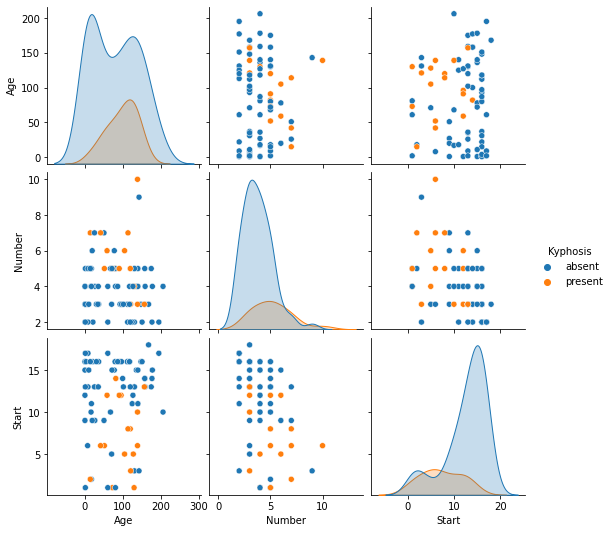

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree=DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
pred=dtree.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[16  5]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.80      0.76      0.78        21
     present       0.29      0.33      0.31         6

    accuracy                           0.67        27
   macro avg       0.54      0.55      0.54        27
weighted avg       0.69      0.67      0.68        27



In [16]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc=RandomForestClassifier(n_estimators=200)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
pred1=rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test,pred1))

[[20  1]
 [ 5  1]]


In [28]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

      absent       0.80      0.95      0.87        21
     present       0.50      0.17      0.25         6

    accuracy                           0.78        27
   macro avg       0.65      0.56      0.56        27
weighted avg       0.73      0.78      0.73        27



In [30]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 

In [34]:
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

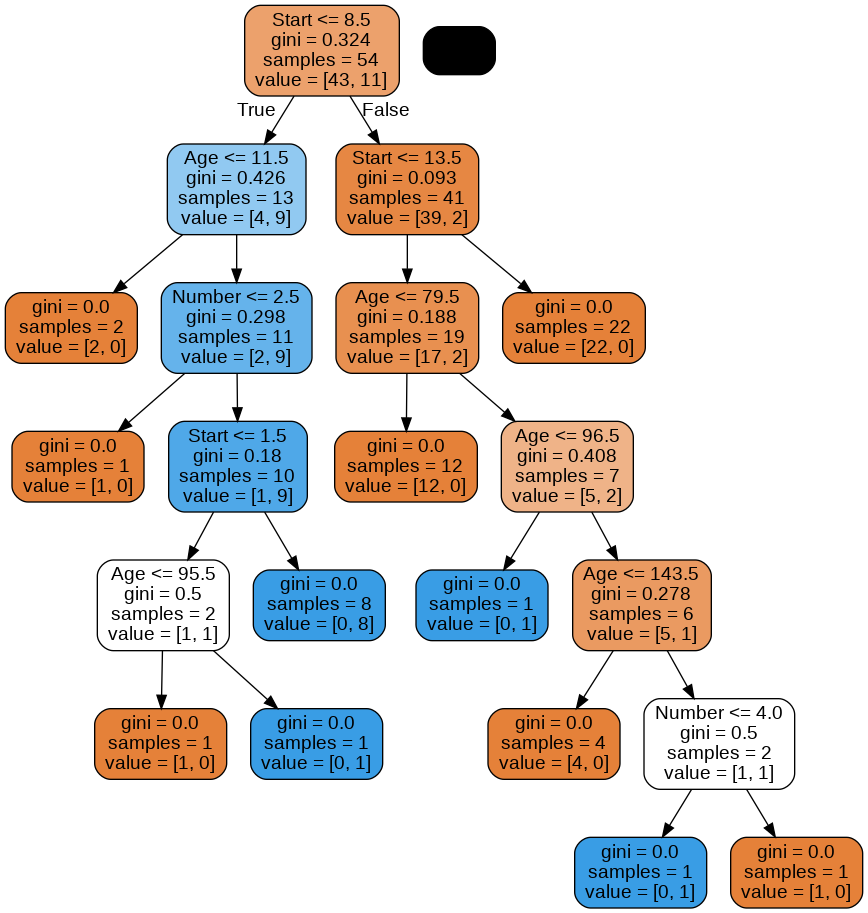

In [35]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

**PART-2**